# Bootstrap

## Introdução

Bootstrap é uma técnica de reamostragem com o objetivo de tentar validar algum parâmetro estatístico $\theta$ da população, tentando estimar a variabilidade do mesmo para poder criar um intervalo de confiança, usando apenas o mesmo conjunto amostral. Supondo que você tem um conjunto de n pontos e deseja estimar o coeficiente inclinação $\beta$ da reta de regressão, você então encontra o estimador $\hat{\beta}$ usando sua amostra de n pontos e então cria, vamos supor, mais 10 mil amostras aleatórias simples com reposição de tamanho n em cima do mesmo conjunto amostral n, com isso alguns pontos poderão sair repetidos, para cada uma das 10 mil amostras, você obtém um estimador $\hat{\beta}$, com isso, teremos 10 mil estimativas do parâmetro desejado e esse conjunto de estimadores formarão uma estimativa da distribuição desse estimador $\hat{\beta}$ que se espera que seja aproximadamente normal. Isso lhe dará uma noção da variabilidade do estimador e lhe permite calcular um intervalo de confiança para o mesmo.

## Terminologia

Bootstrap é o nome que se dá a alça que há nas botas para auxiliar na hora de calçar:

<img src="boo1.png">

Bootstrap originou a vários termos metafóricos de origem inglesa, como Bootstrapping, que surgiu na década de 1880. O tema comum a todos esses termos metafóricos é a realização de um processo sem ajuda externa, mas com etapas de facilitação interna.

A ideia do método de reamostragem Boostrap é justamente essa, tentar melhorar a estimativa do parâmetro desejado sem ajuda de nenhuma amostra além da que você tem a disposição. 

## Reproduzindo o algoritmo de Bootstrap

Vamos usar como exemplo o conjunto de dados nativo do R chamado *cars*, que nos da a velocidade do carro e a distância percorrida para conseguir parar o carro nesta velocidade, estes dados são de 1920:

In [5]:
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


In [7]:
dim(cars)

[1] 50  2

Vamos supor que a uma empresa acabou de produzir um novo modelo de carro que ela pretende lançar em breve no mercado, e por motivos de segurança ela precisa saber qual é a distância percorrida esperada do carro caso seja preciso pará-lo quando o mesmo estiver em uma determinada velocidade. Ela então te contrata para criar um modelo estatístico que consiga estimar bem essa distância, mas ela só lhe fornece os dados do dataset cars que só têm 50 observações.

Vamos dar uma olhada no gráfico de dispersão destes dados:

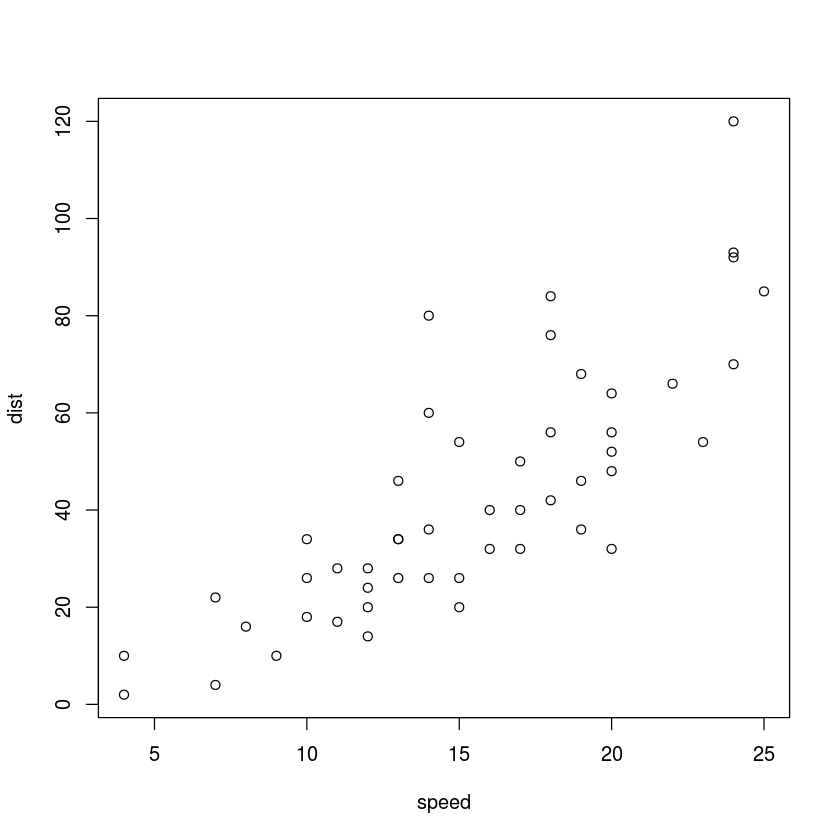

In [6]:
plot(cars)

Podemos notar que há uma correlação linear e entre as duas variáveis e então você decide criar um modelo linear símples do tipo: $$\begin{equation}
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i
\end{equation}$$

Queremos então encontrar o estimador $\hat{\beta_1}$, ou seja, uma estimativa para o coeficiente de inclinação desta reta. Para isso usamos a função lm() do R.

In [8]:
modelo_linear = lm(dist ~ speed, data=cars) 

In [9]:
# vamos dar uma olhada na estimativa dos coeficientes
coef(modelo_linear)

(Intercept)       speed 
 -17.579095    3.932409

Obtemos com essa amostra, $\hat{\beta_1} = 3.93$. O quão boa esta estimativa é? Para isso precisaríamos de várias outras amostras para obter diferentes estimativas e assim criar um intervalo de confiança, caso essa estima de $\hat{\beta_1} = 3.93$ seja razoável, ela estará contida neste intervalo.

Como não temos mais amostras, e a empresa não se mostrou muito disposta em coletar mais dados do tipo, vamos nos virar com o que temos mesmo e simular amostras em cima da que temos, ou seja, iremos usar a técnica de Bootstrapping. Vamos criar mil amostras aleatórias símples com reposição de tamanho 50 retirada das 50 observações reais que já temos.

In [12]:
x = cars$speed
y = cars$dist

In [70]:
set.seed(1)
reamostrar = function(var){
    # Função que gera uma
    # amostra aleatória simples
    # com reposição de tamanho 50
    # recebe como parâmetro um vetor 
    # var com 50 valores
    amostra = sample(var, 50, replace = TRUE, prob = NULL)
    return(amostra)
}

In [71]:
obter_betas = function(n, df){
    # função que gera uma 
    # lista de n estimadores beta
    x = df$speed
    y = df$dist
    betas = rep(0, n)
    for(i in 0:n){
        X = reamostrar(x)
        Y = reamostrar(y)
        modelo = lm(Y ~ X)
        betas[i] = modelo$coefficients['X']
    }
    return(betas)
}

In [76]:
# obtendo 10 mil estimadores de beta
# em cima de amostras retiradas de cars 
estimadores_beta = obter_betas(10000, cars)

Vamos verificar a distrinuição desses estimadores, esperamos ver algo semelhante a curva normal, conforme dita o teorema do limite central.

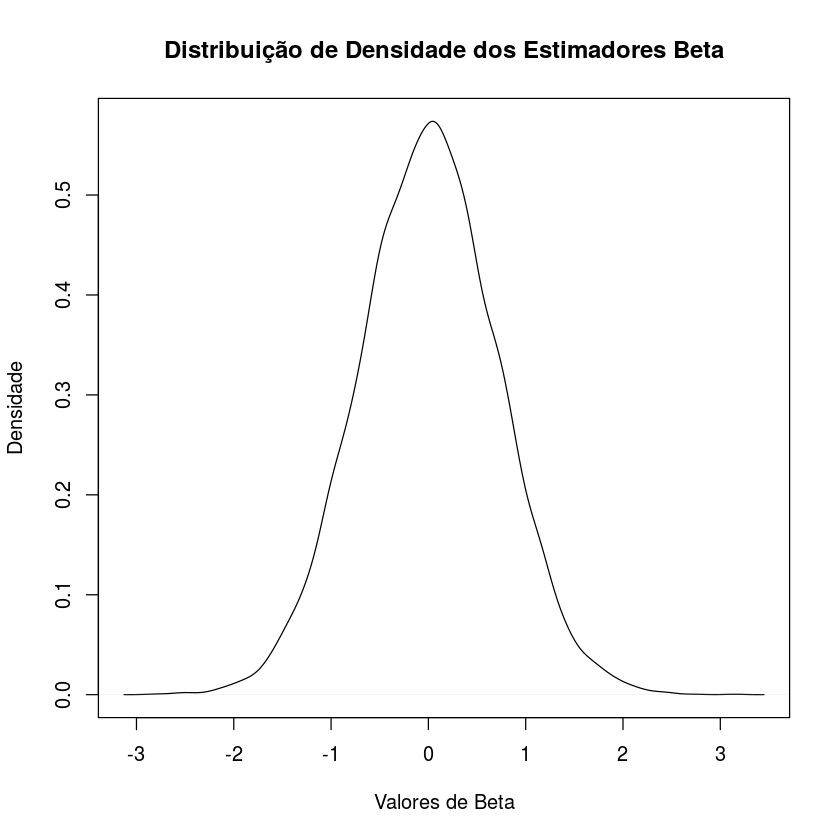

In [77]:
plot(density(estimadores_beta), 
     main = 'Distribuição de Densidade dos Estimadores Beta',
     xlab = 'Valores de Beta',
     ylab = 'Densidade')

Para um intervalo de confiança de 95%, temos $\alpha = 5\%$, e portanto $\alpha/2 = 2.5\%$ apara a calda inferior e superior, comforme a figura a seguir:

<img src='normal.png'>

Para obter esses o valores, usamos a função quantile() para encontrar $\hat{\beta_1}$ que deixa 2.5% das observações atrás dele e o $\hat{\beta_1}$ que deixa 97.5% das bservações atrás dele.

In [78]:
quantile(estimadores_beta, 0.025)

2.5% 
-1.382668

In [79]:
quantile(estimadores_beta, 0.975)

97.5% 
1.382942

Portanto, esperamos com 95% de confiança que $\beta_1$ de nossa população de interesse esteja entre -1.38 e 1.38. Concluimos então que nosso estimador inicial de $\hat{\beta_1} = 3.93$ não foi muito feliz, pois está fora deste intervalo.